## Atividade 03

# Etapa 01
Nesta atividade vocês precisarão implementar o modelo gaussiano no Python. Vocês devem realizar os seguintes tópicos:

- Implementar uma função para determinar a classe de estabilidade de Pasquil para diferentes condições atmosféricas.

- Implementar a função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade.

- Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs (quem fizer o método de Briggs ganha um ponto a mais). Deve ser considerado o efeito Tip-Downwash

- Implementar a função do modelo gaussiano

- Realizar simulações com o script criado, utilizando diferentes classes de estabilidade, velocidades do vento, alturas de chaminé. Considere a taxa de emissão que você estimou na primeira atividade. Encontre a altura de chaminé necessária para que as concentrações não violem os padrões da Resolução CONAMA 491.

- Faça figuras e discuta os resultados.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H):
    termo1 = qs / (2 * np.pi * sigmaY * sigmaZ * u)
    termo2 = np.exp((-y ** 2) / (2 * sigmaY ** 2))
    termo3 = np.exp((-(z - H) ** 2) / (2 * sigmaZ ** 2)) + np.exp((-(z + H) ** 2) / (2 * sigmaZ ** 2))
    conc = termo1 * termo2 * termo3
    conc = conc * 10 ** 6
    return conc

def sigmaXY(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if (classe == 'A') or (classe == 'B'):
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** -0.5
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** 0.5
        else:
            print('Classe de estabilidade errada')
    if urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x) ** -0.5
            sigmaZ = 0.20 * x
        else:
            print('Classe de estabilidade errada. Fique ligado')
    return sigmaY, sigmaZ

def deltaHdavidsonBryant(d, vs, u, Ts, Tamb):
    deltaH_Davidson_Bryant = (d * (vs / u) ** 1.4) * (1 + (Ts - Tamb) / Ts)
    return deltaH_Davidson_Bryant

def holland_tipdownwash(d, vs, u, Ts, Tamb):
    deltaH_Holland = ((vs * d) / u) * (1.5 + 2.68 * 10 ** -10 * 1013.25 * ((Ts - Tamb) / Ts) * d)
    return deltaH_Holland

# Utilizando a função do modelo gaussiano
qs = 100  # g/s
sigmaY = 10  # m
sigmaZ = 15  # m
u = 10  # m/s
y = 0  # estimando na direção do vento
z = 1.5  # altura do nariz
H = 50  # m

# Chamando a função do modelo gaussiano
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H)
print("A concentração estimada é = " + str(conc) + ' [g/m³]')

# Criando domínio de modelagem 
x = np.linspace(0.1, 10000, 500)  # evite divisão por zero com x >= 0.1
y = np.linspace(-10000, 10000, 500)

# Criando matrizes de x e y
xx, yy = np.meshgrid(x, y)

# Adotando inputs
classe = 'A'
urbOrRural = 'urbano'
hg = 150  # m altura geométrica da chaminé
qs = 100  # g/s
u = 5  # m/s
y = 0  # estimando na direção do vento
z = 1.5  # altura do nariz
d = 1  # em metros
vs = 10  # em m/s
Ts = 300  # em Kelvin
Tamb = 293  # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY, sigmaZ = sigmaXY(xx, classe, urbOrRural)

if vs > 1.5 * u:
    # Estimando a sobrelevação da pluma (deltaH) - Davidson Bryant
    deltaH = deltaHdavidsonBryant(d, vs, u, Ts, Tamb)
    print('deltaH_Davidson_Bryant = ' + str(deltaH))
    deltaH = holland_tipdownwash(d, vs, u, Ts, Tamb)
    print('deltaH_Holland = ' + str(deltaH))
    hef = hg + deltaH
    print('A pluma subiu')
else:
    hef = hg + 2 * d * ((vs / u) - 1.5)
    print('A pluma caiu')

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, yy, z, hef)




A concentração estimada é = 86.2052564132534 [g/m³]
deltaH_Davidson_Bryant = 2.700592857381857
deltaH_Holland = 3.00000001267238
A pluma subiu


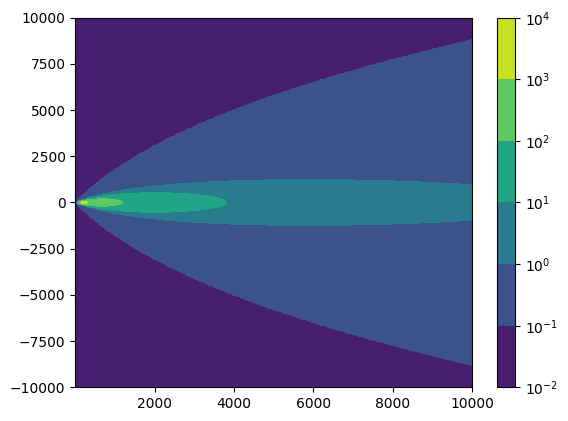

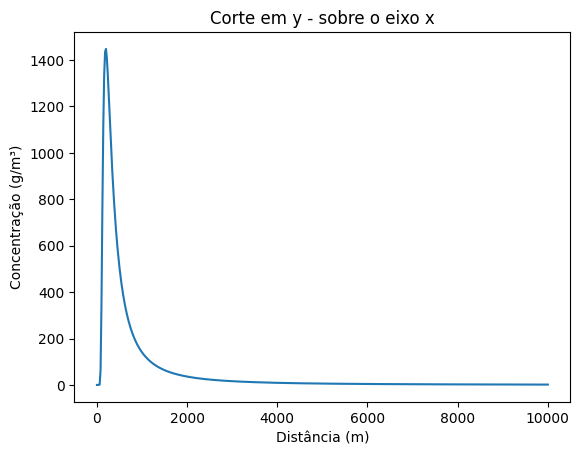

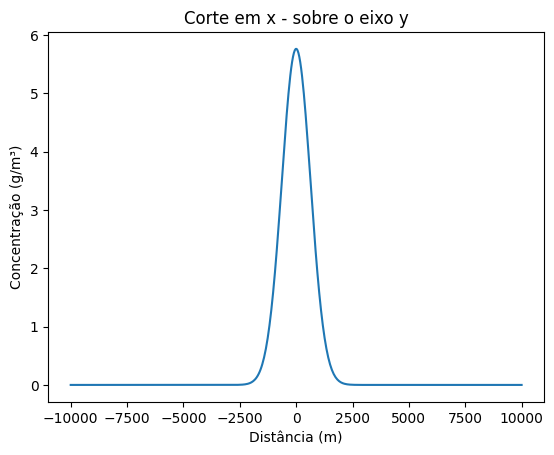

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def classify_pasquill_stability(wind_speed, solar_radiation, cloud_cover, is_daytime):
    if is_daytime:
        if solar_radiation == 'alta':
            if wind_speed < 2:
                return 'A'
            elif wind_speed < 3:
                return 'B'
            elif wind_speed < 5:
                return 'C'
            elif wind_speed < 6:
                return 'D'
            else:
                return 'D'
        elif solar_radiation == 'média':
            if wind_speed < 2:
                return 'B'
            elif wind_speed < 3:
                return 'B'
            elif wind_speed < 5:
                return 'C'
            elif wind_speed < 6:
                return 'D'
            else:
                return 'D'
        elif solar_radiation == 'baixa':
            if wind_speed < 2:
                return 'C'
            elif wind_speed < 3:
                return 'C'
            elif wind_speed < 5:
                return 'D'
            elif wind_speed < 6:
                return 'D'
            else:
                return 'D'
    else:
        if cloud_cover == 'baixa':
            if wind_speed < 2:
                return 'F'
            elif wind_speed < 3:
                return 'E'
            elif wind_speed < 5:
                return 'D'
            else:
                return 'D'
        elif cloud_cover == 'média':
            if wind_speed < 2:
                return 'E'
            elif wind_speed < 5:
                return 'D'
            else:
                return 'D'
        elif cloud_cover == 'alta':
            return 'D'

def sigmaXY(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe == 'A':
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** -0.5
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'B':
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** -0.5
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x) ** -0.5
            sigmaZ = 0.20 * x * (1 + 0.0004 * x) ** 0.5
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x) ** -0.5
            sigmaZ = 0.14 * x * (1 + 0.0003 * x) ** 0.5
        elif classe == 'E':
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** -0.5
            sigmaZ = 0.08 * x * (1 + 0.0003 * x) ** 0.5
        elif classe == 'F':
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** -0.5
            sigmaZ = 0.08 * x * (1 + 0.0003 * x) ** 0.5
        else:
            raise ValueError('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x) ** -0.5
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x) ** -0.5
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x) ** -0.5
            sigmaZ = 0.08 * x
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x) ** -0.5
            sigmaZ = 0.06 * x
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x) ** -0.5
            sigmaZ = 0.03 * x
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x) ** -0.5
            sigmaZ = 0.016 * x
        else:
            raise ValueError('Classe de estabilidade errada')
    else:
        raise ValueError('Tipo de área errada')
    return sigmaY, sigmaZ

def deltaHdavidsonBryant(d, vs, u, Ts, Tamb):
    deltaH = (d * (vs / u) ** 1.4) * (1 + (Ts - Tamb) / Ts)
    return deltaH

def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H):
    termo1 = qs / (2 * np.pi * sigmaY * sigmaZ * u)
    termo2 = np.exp((-y ** 2) / (2 * sigmaY ** 2))
    termo3 = np.exp((-(z - H) ** 2) / (2 * sigmaZ ** 2)) + np.exp((-(z + H) ** 2) / (2 * sigmaZ ** 2))
    conc = termo1 * termo2 * termo3
    conc = conc * 10 ** 6
    return conc

# Dados de entrada
wind_speed = 3.5  # m/s
solar_radiation = 'média'  # alta, média, baixa
cloud_cover = 'baixa'  # alta, média, baixa
is_daytime = True  # True para dia, False para noite
classe = classify_pasquill_stability(wind_speed, solar_radiation, cloud_cover, is_daytime)
urbOrRural = 'urbano'

# Criando domínio de modelagem
x = np.linspace(0.1, 10000, 500)  # evite divisão por zero com x >= 0.1
y = np.linspace(-10000, 10000, 500)

# Criando matrizes de x e y
xx, yy = np.meshgrid(x, y)

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY, sigmaZ = sigmaXY(xx, classe, urbOrRural)

# Parâmetros adicionais
qs = 100  # g/s
u = 5  # m/s
z = 1.5  # altura do nariz
H = 50  # m (altura inicial da chaminé)
d = 1  # em metros
vs = 10  # em m/s
Ts = 300  # em Kelvin
Tamb = 293  # em Kelvin

# Estimativa de sobrelevação da pluma (deltaH)
if vs > 1.5 * u:
    deltaH = deltaHdavidsonBryant(d, vs, u, Ts, Tamb)
    hef = H + deltaH
else:
    hef = H + 2 * d * ((vs / u) - 1.5)

# Calculando concentração com modelo gaussiano
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, yy, z, hef)

# Visualização dos resultados no espaço
fig, ax = plt.subplots()
contour = ax.contourf(xx, yy, conc + 0.1, norm=LogNorm())
fig.colorbar(contour)

plt.show()

# Corte em y - sobre o eixo x
fig, ax = plt.subplots()
ax.plot(x, conc[len(y) // 2, :])
plt.xlabel('Distância (m)')
plt.ylabel('Concentração (g/m³)')
plt.title('Corte em y - sobre o eixo x')
plt.show()

# Corte em x - sobre o eixo y
fig, ax = plt.subplots()
ax.plot(y, conc[:, len(x) // 2])
plt.xlabel('Distância (m)')
plt.ylabel('Concentração (g/m³)')
plt.title('Corte em x - sobre o eixo y')
plt.show()
